# IS620 Group Project

<b>Group project: Using any of the three classifiers described in chapter 6 of Natural Language Processing with Python, and any features you can think of, build the best name gender classifier you can. Begin by splitting the Names Corpus into three subsets: 500 words for the test set, 500 words for the dev- test set, and the remaining 6900 words for the training set. Then, starting with the example name gender classifier, make incremental improvements. Use the dev-test set to check your progress. Once you are satisfied with your classifier, check its final performance on the test set. How does the performance on the test set compare to the performance on the dev-test set? Is this what you'd expect?</b>

<font color= blue> <b>Group Members:- Aaron Palumbo, Brian Chu,  David Stern, Partha Banerjee;  Rohan Fray, Tulasi Ramarao;</b></font>

## Dependencies

In [127]:
import nltk
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree

## Split Data

In [128]:
names = nltk.corpus.names

maleNames = names.words('male.txt')
femaleNames = names.words('female.txt')

* Training Data

    * Train Set: Used to train the model

    * Validation Set: Model Selection

* Test Set: Measure Final Model performance (Only use this once at the end)

There are different numbers of male and female names:

In [129]:
print "Number of male names: {}".format(len(maleNames))
print "Number of female names: {}".format(len(femaleNames))

Number of male names: 2943
Number of female names: 5001


We will have to do our splits separately. We will split the data with the goal of maintaining the same ratio of male to female in our train, validation, and test sets.

In [130]:
perMale = 1.0 * len(maleNames) / (len(maleNames) + len(femaleNames))
perMale

# total names
numNames = len(names.words())
# number used for testing
numTesting = 1000
# slit between final test and validation
perTest = 0.5

# numbers for data splitting
numTestingMale = int(perMale * numTesting)
numTestingFemale = numTesting - numTestingMale
#print numTestingMale
#print numTestingFemale

numTestMale = int(numTesting * perTest * perMale)
numTestFemale = int(numTesting *  perTest - numTestMale)
#print numTestMale
#print numTestFemale


In [131]:
maleTrain, maleTesting = train_test_split(
    maleNames, test_size=numTestingMale, random_state=5)
maleVal, maleTest = train_test_split(
    maleTesting, test_size=numTestMale, random_state=6)

femaleTrain, femaleTesting = train_test_split(
    femaleNames, test_size=numTestingFemale, random_state=7)
femaleVal, femaleTest = train_test_split(
    femaleTesting, test_size=numTestFemale, random_state=8)

#print(maleTrain)
# Check numbers
print "Val Set   = {} (Should be 500)".format(len(maleVal) + len(femaleVal))
print "Test Set  = {} (Should be 500)".format(len(maleTest) + len(femaleTest))
print "Train Set = {} (Should be >6900)".format(len(maleTrain) + len(femaleTrain))


Val Set   = 500 (Should be 500)
Test Set  = 500 (Should be 500)
Train Set = 6944 (Should be >6900)


In [132]:
train = pd.DataFrame({'name': maleTrain + femaleTrain,
                      'sex': (['male'] * len(maleTrain) + 
                              ['female'] * len(femaleTrain))})
validation = pd.DataFrame({'name': maleVal + femaleVal,
                           'sex': (['male'] * len(maleVal) +
                                   ['female'] * len(femaleVal))})

##### Use this set in the end !!!!
test = pd.DataFrame({'name': maleTest + femaleTest,
                     'sex': (['male'] * len(maleTest) +
                             ['female'] * len(femaleTest))})

print (train.head())
#print(len(train))
#print((validation))
#print(len(test))


       name   sex
0   Barthel  male
1  Claudius  male
2    Aharon  male
3  Staffard  male
4    Rollin  male



Use the above code to start another notebook to explore an algorithm. Make sure to use the splits as defined above and to not use the final test set to tune your model. =-)

<font color = green size =5> Decision Tree Algorithm </font> <br>

Binary Variable Decision Tree (Whether a given name is that of a male or a female.


In [133]:
trainList = train.values.tolist()
print(len(trainList))
print(train.head())

6944
       name   sex
0   Barthel  male
1  Claudius  male
2    Aharon  male
3  Staffard  male
4    Rollin  male


In [134]:
# count vowels 
def countVowel(word):
    count = 0;
    for w in word:
        if w == "a":
            count = count + 1;
        if w == "e":
             count = count + 1;
        if w == "i":
             count = count + 1;
        if w == "o":
             count = count + 1;
        if w == "u":
             count = count + 1;
    return count

# if count of vowels less than 2 or not
def numOfVowels(word):
    if countVowel(word) == 2:
        return 2
    elif countVowel(word) == 3:
        return 0
    else:
        return 0

def firstLetterK(word):
    if ( word[1] == "K"):
        return 1
    else:
        return 0


In [135]:
from nltk.classify import DecisionTreeClassifier

# Feature extractor function.
def gender_features(word):
    return {'last_letter': word[-1]}

def gender_featuresM(word):
    features = {}
    features["first_letter"] = word[0].lower()
    features["last_letter"] = word[-1].lower()
    return features

def gender_features2(word):
    if countVowel(word) > 0:
        return {'last_letter': "t"}
    else:
        return {'last_letter': "f"}

def gender_featuresStr(word):   
    features = {}
    features["fletter"] = word[0].lower()
    features["lletter"] = word[-1].lower()
    features["length"] = len(name)
    features["countOfVowels"] = numOfVowels(word)
    features["fLetterK"] = firstLetterK(word)
    return {'first_letter': word[0].lower(),
            'last_letter': word[-1].lower(),
             'length': len(word),
           'countVowels': numOfVowels(word),
           'fLetterK': firstLetterK(word)}

def gender_featuresM2(word):
    features = {}
    features["fletter"] = word[0].lower()
    features["lletter"] = word[-1].lower()
    features["length"] = len(name)
    features["countOfVowels"] = numOfVowels(word)
    features["fLetterK"] = firstLetterK(word)
    return features


Starting with the example name gender classifier, incremental improvements are made. <br>
A. First uses the feature - that uses only the last letter. 
B. Then used the feature - that uses first letter and the last letter
C. Lastly, used the feature - that uses first letter, last letter, length of word, vowelCount and the first letter 'K'

Used the Train set to check the progress. <br> 
Applied the first feature set (namely, the last letter only).

In [136]:
# Extract features for Train
featuresetsTrSimple = [(gender_features(name), gender) for index, (name, gender) in train.iterrows()]
# Split train and test set
#train_set, test_set = featuresets[500:], featuresets[:500]

# Extract features for validation set
featuresetsVSimple = [(gender_features(name), gender) for index, (name, gender) in validation.iterrows()]
# Extract features for Test set
featuresetsTstSimple = [(gender_features(name), gender) for index, (name, gender) in test.iterrows()]


dt_classifierSimple = DecisionTreeClassifier.train(featuresetsTrSimple,
binary=True, entropy_cutoff=0.8, depth_cutoff=5, support_cutoff=30)

# Test classifier on "Neo" and Trinity
print "Neo is ", dt_classifierSimple.classify(gender_features('Neo'))
print "Trinity is ", dt_classifierSimple.classify(gender_features('Trinity'))

#male
#female
print nltk.classify.accuracy(dt_classifierSimple,featuresetsTrSimple)
0.718173963134


Neo is  male
Trinity is  female
0.718173963134


0.718173963134

The gender test on the matrix cast Neo and Trinity came out ok. <br>
Also, the classification accuracy is 0.71817 <br>
<br>
Now use the featureset ( that uses first and last name) to see if the accuracy improves. <br>


In [137]:
# Extract features for Train
featuresetsTrM = [(gender_featuresM(name), gender) for index, (name, gender) in train.iterrows()]
# Split train and test set
#train_set, test_set = featuresets[500:], featuresets[:500]

# Extract features for validation set
featuresetsVM = [(gender_featuresM(name), gender) for index, (name, gender) in validation.iterrows()]
# Extract features for Test set
featuresetsTstM = [(gender_featuresM(name), gender) for index, (name, gender) in test.iterrows()]


dt_classifierM = DecisionTreeClassifier.train(featuresetsTrM,
binary=True, entropy_cutoff=0.8, depth_cutoff=5, support_cutoff=30)

# Test classifier on "Neo" and Trinity
print "Neo is ", dt_classifierM.classify(gender_featuresM('Neo'))
print "Trinity is ", dt_classifierM.classify(gender_featuresM('Trinity'))

#male
#female
print nltk.classify.accuracy(dt_classifierM,featuresetsTrM)
#0.71875


Neo is  male
Trinity is  female
0.71875


The resulting value stayed at 0.71875( a bit better than before) <br> The gender test for Neo and Trinity is still good.

In [138]:
# Extract features for Train
featuresetsTr2 = [(gender_featuresStr(name), gender) for index, (name, gender) in train.iterrows()]
# Split train and test set
#train_set, test_set = featuresets[500:], featuresets[:500]
# Extract features for validation set
featuresetsV2 = [(gender_featuresStr(name), gender) for index, (name, gender) in validation.iterrows()]
# Extract features for Test set
featuresetsTst2 = [(gender_featuresStr(name), gender) for index, (name, gender) in test.iterrows()]


dt_classifier3 = DecisionTreeClassifier.train(featuresetsTr2,
binary=True, entropy_cutoff=0.8, depth_cutoff=5, support_cutoff=30)

# Test classifier on "Neo" and Trinity
print "Neo is ", dt_classifier3.classify(gender_featuresStr('Neo'))
print "Trinity is ", dt_classifier3.classify(gender_featuresStr('Trinity'))

#male
#female
print nltk.classify.accuracy(dt_classifier3,featuresetsTst2)
#0.676


Neo is  male
Trinity is  female
0.676


The theory that adding more specifics could improve the accuracy did not hold. <br>
Adding, last letter, length of the name, count of vowels in a  name, first letter k(or not) <br> only resulted in the same results as before 0.672. <br> The gender test for Neo and Trinity is still good.

Note: Observe that these character names from The Matrix (Neo and Trinity) are 
correctly classified. Although this science fiction movie is set in 2199, it still conforms with our expectations about names and genders. 
We can systematically evaluate the classifier on a much larger quantity of unseen data.


So the best classifier to use is at the stage where last letter and the first letter is used, so using that feature on the test set and the validation set.

In [139]:
# so the best one was to use 
print "first and last name classifier for the Training data"
print nltk.classify.accuracy(dt_classifierM,featuresetsTrM)    
#0.71875

#Testing on the test data    
print "first and last name classifier for the Test data"
print nltk.classify.accuracy(dt_classifierM, featuresetsTstM)
#0.676

#Testing on the test data    
print "first and last name classifier for the Validation data"
print nltk.classify.accuracy(dt_classifierM, featuresetsVM)
#0.734

#from Classifier for Vowels:(search for Trinity): female
#0.678305400372

sorted(dt_classifierM.labels())
print(dt_classifierM)


first and last name classifier for the Training data
0.71875
first and last name classifier for the Test data
0.676
first and last name classifier for the Validation data
0.734
last_letter=d? ........................................ male
else: ................................................. female
  last_letter=s? ...................................... female
    first_letter=g? ................................... female
    else: ............................................. male
  else: ............................................... female
    last_letter=r? .................................... male
    else: ............................................. female
      last_letter=o? .................................. male
      else: ........................................... female



So, the performance on the test set gave a reading of 0.676 and definitely not good. <br> However, it gave 0.734 on the validation test. 

Just verify if the elements in the dataset is still the same as when I started out. <br> Must give Kristos, Orton and Shea. 

In [140]:
# Just to make sure we all see the same thing
print train.loc[56, :]
print
print validation.loc[38, :]
print
print test.loc[486, :]

name    Kristos
sex        male
Name: 56, dtype: object

name    Orton
sex      male
Name: 38, dtype: object

name      Shea
sex     female
Name: 486, dtype: object


Try a different approach and store only numerical values for all the features. <br> 
Create methods for that purpose

In [141]:
       
#return the name
def nameOnly(name):
    return name;


# assign and get 1 or 0 for the ending in vowel or not 
def LastLetterVowelD(word):
    if  word[-1] in 'aeiou': return 1
    else: return 0

# assign and get numbers for words ending with a particular vowel
# binary/boolean is better for algorithms 
def LastLetterVowel(word):
    if  word[-1] in 'aeiou':return {'last_vowel': 1}
    else:return {'last_vowel': 0}
    
# get the last letter
def lastLetter(word):
    return {'last_letter': word[-1]}
    

# return if sex is male or not
def MaleOrNot(sex):
    #print(gender)
    if (sex[0] == "m"): return True
    else: return False

# return if sex is female or not
def FemaleOrNot(sex):
    #print(gender[0])
    if (sex[0] == "f"):return True
    else: return False
       
# get name 'n sex from lists: maleNames and femaleNames
names = ([(name,'male') for name in maleNames] + [(name,'female') for name in femaleNames])

# get names only from lists: maleNames and femaleNames
namesOnly = ([(name) for name in maleNames] + [(name) for name in femaleNames])

myList=["Sample_"+ str(x) for x in range(1,6945)]
#print("Mylist=",myList)

Shuffle the train set and create a new dataframe with only integers so the graph can be plotted as well. Different features are added as columns including: <br> 
is lastletter a vowel, number of vowels and is firstletter k. <br> 
fit the data calling classifer.fit and predict. <br>

In [142]:
import random

## TRAIN set
# convert the training data already created above for use
trainList = train.values.tolist()

# shutffle the list 
random.shuffle(trainList)

#print(len(trainList))
theNames = [(nameOnly(n),LastLetterVowelD(n),numOfVowels(n),firstLetterK(n),g) for (n,g) in trainList]
# convert the test and the validation data to dataframe
theNames_pd = pd.DataFrame(theNames)
theNames_pd = theNames_pd.rename(columns = {0:'nameOnly',1:'LastLetterVowelD',2:'numofVowelsD',
                                            3:'firstLetterK',4:'gender'})

#LastVowel,isMale,isFemale
df = theNames_pd.iloc[:,[1,2,3]]
#print df.head()
X = df.values
y=df.numofVowelsD

## VALIDAION set
# convert the training data already created above for use
validationList = validation.values.tolist()
#print(len(validationList))

# shutffle the list 
random.shuffle(validationList)

theNames2 = [(nameOnly(n),LastLetterVowelD(n),numOfVowels(n),firstLetterK(n),g) for (n,g) in validationList]
# convert the test and the validation data to dataframe
theNames_pd2 = pd.DataFrame(theNames2)
theNames_pd2 = theNames_pd2.rename(columns = {0:'nameOnly',1:'LastLetterVowelD',2:'numofVowelsD',
                                            3:'firstLetterK',4:'gender'})

#LastVowel,isMale,isFemale
df2 = theNames_pd2.iloc[:,[1,2,3]]
#print df2.head()
X2 = df2.values
y2=df2.numofVowelsD


# classifier for Train data
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

# classifier for Validation data
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X2,y2)
#print("clf2=" , clf2)
predicted_train_y=clf.predict(X)
predicted_val_y=clf.predict(X2)

print("predicted values = ")
#print(predicted_train_y)
#print(predicted_val_y)
print( 1 * sum(y == predicted_train_y)/len(y))
print( 1 * sum(y2 == predicted_val_y)/len(y2))




predicted values = 
1
1


The predicted values are 1. Now, visuazlize the tree - 

In [143]:
# Save the trees in pdf format 

from sklearn.externals.six import StringIO  
import pydot 

# tree for test data
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("clfGraph.pdf") 

# tree for test data
dot_data = StringIO() 
tree.export_graphviz(clf2, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("clf2Graph.pdf") 


Oct 25 18:16:56 tulasis-MBP.home dot[13376] <Error>: The function ‘CGFontGetGlyphPath’ is obsolete and will be removed in an upcoming update. Unfortunately, this application, or a library it uses, is using this obsolete function, and is thereby contributing to an overall degradation of system performance.
Oct 25 18:16:56 tulasis-MBP.home dot[13376] <Error>: The function ‘CGFontGetGlyphPaths’ is obsolete and will be removed in an upcoming update. Unfortunately, this application, or a library it uses, is using this obsolete function, and is thereby contributing to an overall degradation of system performance.

Oct 25 18:16:57 tulasis-MBP.home dot[13377] <Error>: The function ‘CGFontGetGlyphPath’ is obsolete and will be removed in an upcoming update. Unfortunately, this application, or a library it uses, is using this obsolete function, and is thereby contributing to an overall degradation of system performance.
Oct 25 18:16:57 tulasis-MBP.home dot[13377] <Error>: The function ‘CGFontGetG

True

In [144]:
#print dt_classifier.pseudocode(depth=6)

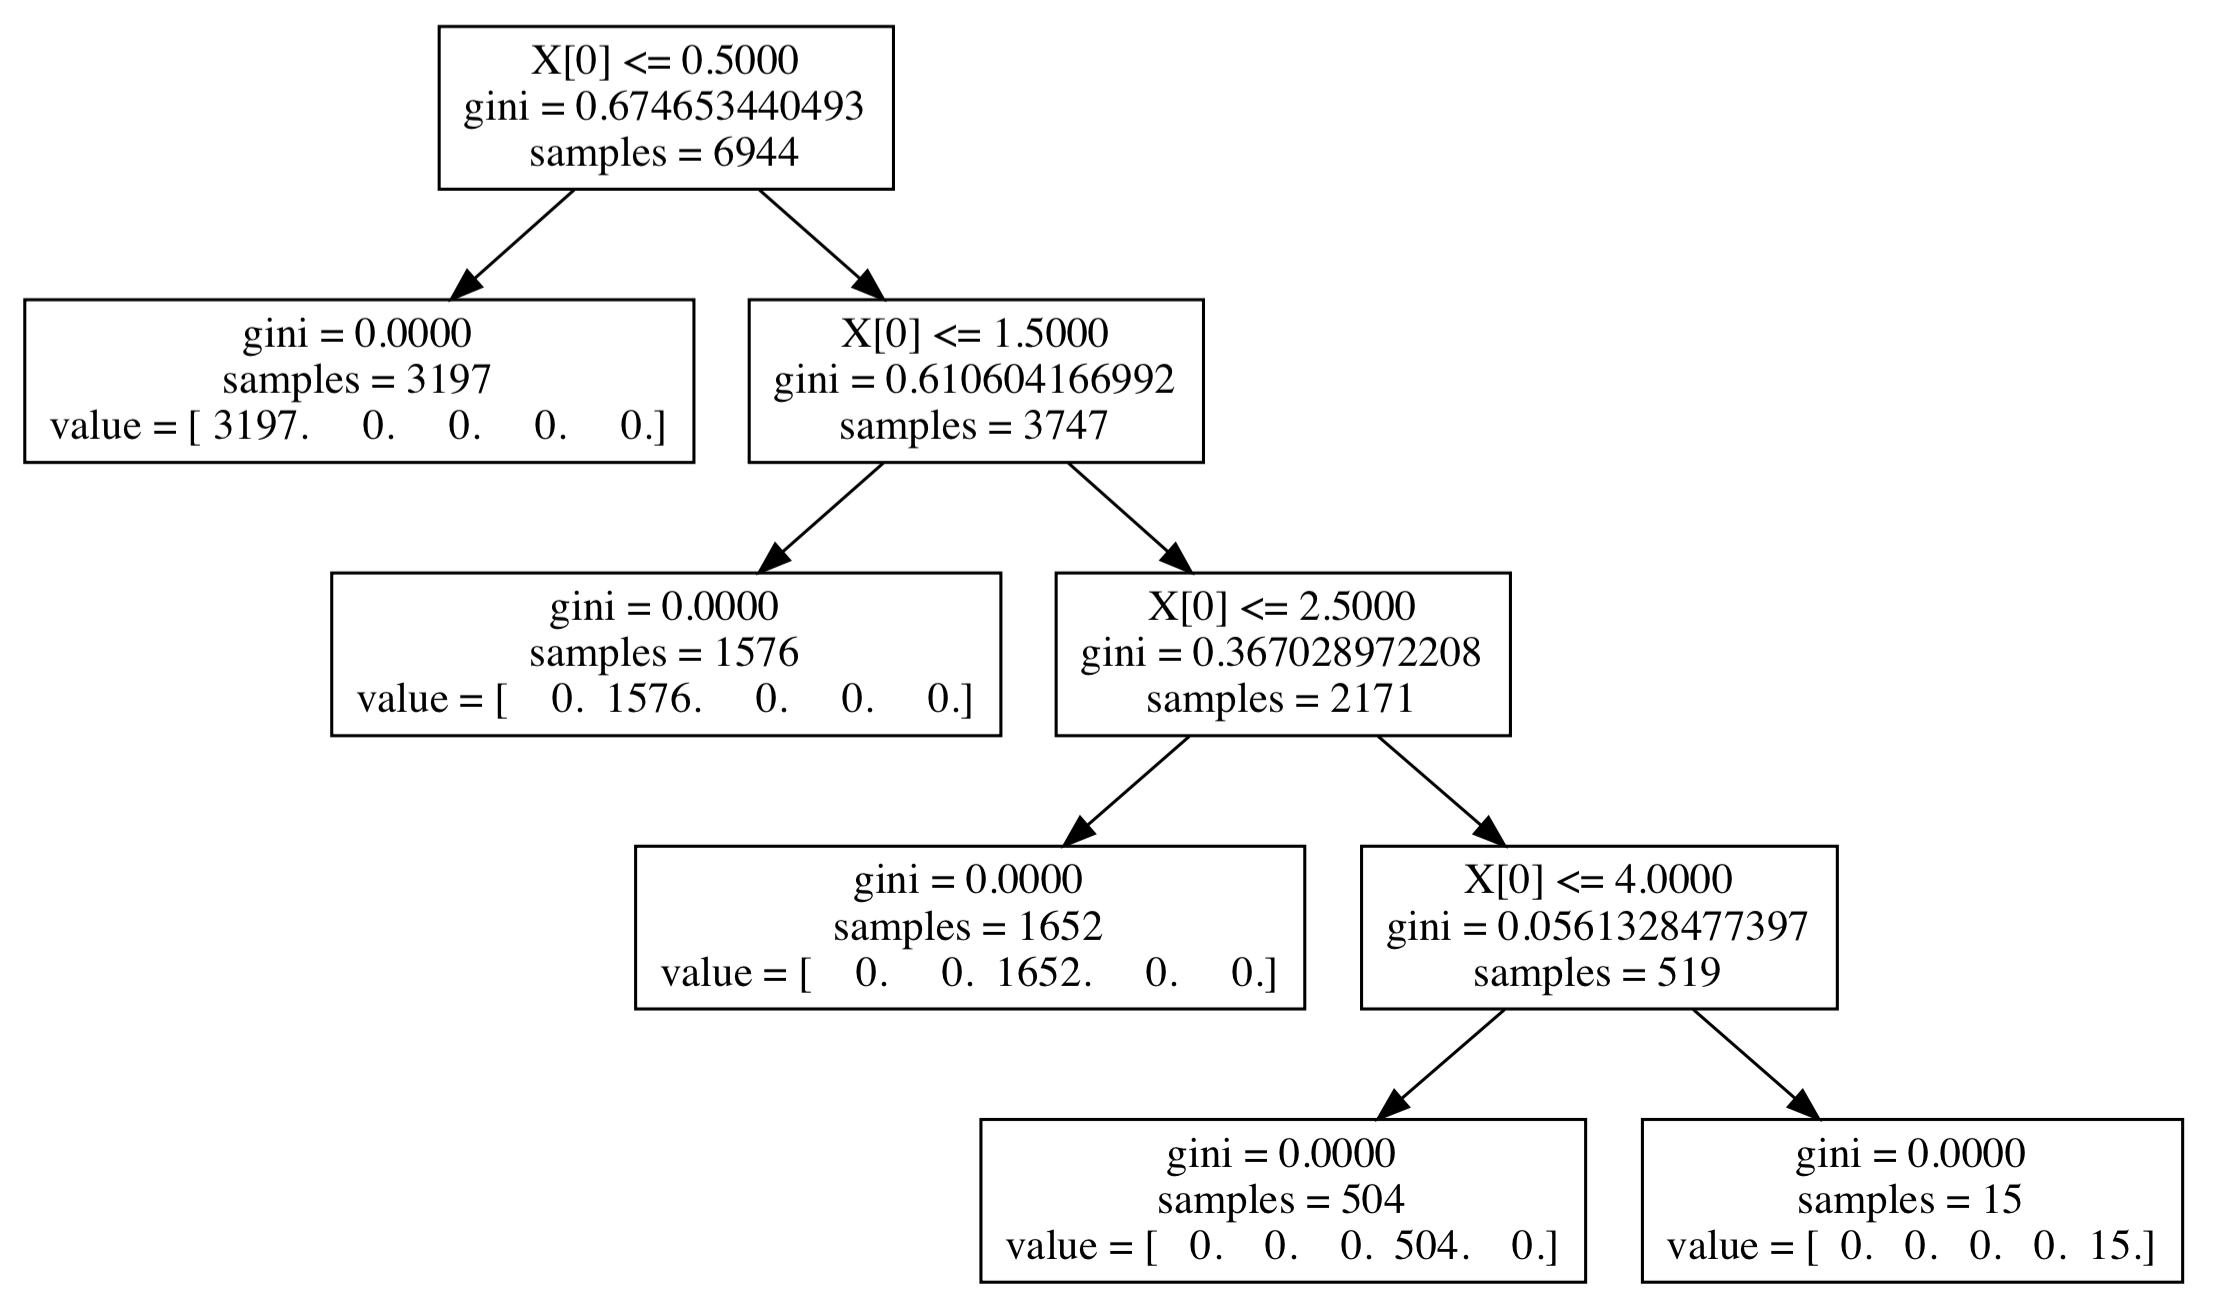

In [145]:
from IPython.display import Image
Image(filename='clfOneExample.png')

Gini index is an impurity-based criterion that measures the divergences between
the probability distributions of the target attribute’s values

<b> Results from choosing different features for the DecisionTree Classifier: </b><br> 
Choosing only the last letter: 0.718. <br>
Choosing the last letter and the first letter: 0.71875 <br>
Choosing the classifer that considered- last letter, length of the name, count of vowels in a  name, first letter k or not: 0.676 <br>


Advantages of DT: <br>
a) In the decision tree, the top few nodes on which the tree is split are the most important variables and the feature selection is completed automatically. <br>

b) Prep time is low as the missing values will not prevent splitting the data for building the trees. <br>
c) DT does not require any linearity in the data. 

Disadvantages <br> 
Without proper pruning to limit the tree growth, DT tends to overfit the training data and hence DT is generally considered as poor predictors.

